In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
!pip install pymorphy3 inflect spacy scikit-learn
!python -m spacy download en_core_web_sm
!python -m spacy download ru_core_news_sm


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 102.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 107.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

**Задание 1: Векторизация текста с использованием Мешка слов (BoW) и TF-IDF**

1. Создайте корпус из минимум 10 текстовых документов (можно взять новостные статьи, отзывы на товары, статьи по одной тематике).
2. Реализуйте предобработку текста, включающую:
* Приведение к нижнему регистру
* Токенизацию
* Удаление стоп-слов и пунктуации
* Лемматизацию/стемминг
3. Реализуйте модель Мешка слов (BoW) с использованием CountVectorizer из scikit-learn.
4. Реализуйте модель TF-IDF с использованием TfidfVectorizer из scikit-learn.
5. Найдите 10 самых значимых терминов для каждого документа по обоим подходам и сравните результаты.
6. Визуализируйте сходство документов с помощью метрики косинусного расстояния для обоих подходов.
7. Прокомментируйте разницу в результатах между BoW и TF-IDF

СРАВНЕНИЕ ТОП-10 ТЕРМИНОВ (ПЕРВЫЕ 3 ТЕКСТА):

Документ №1:
  BoW:    vanilla, warm, want, smell, yum, type, like, marshmallow, tihota, sweet
  TF-IDF: warm, vanilla, want, smell, yum, type, marshmallow, like, vaniglia, tihota

Документ №2:
  BoW:    flower, water, toilet, remember, name, even, floral, ball, wasnt, warmth
  TF-IDF: flower, water, remember, toilet, floral, even, name, ussr, warmth, cant

Документ №3:
  BoW:    gardenia, tuberose, floral, delightful, subtle, nostalgia, anyone, note, truly, touch
  TF-IDF: gardenia, tuberose, stunning, osmanthus, perfect, creates, perfectly, classic, choice, touch

Документ №4:
  BoW:    like, fresh, also, human, hike, oasis, grey, green, outside, giant
  TF-IDF: fresh, like, oasis, hike, green, human, also, never, hunkofmetal, outside

Документ №5:
  BoW:    much, white, altogether, valaya, nose, built, happy, og, clean, one
  TF-IDF: white, much, altogether, built, happy, og, airier, core, lane, soapy

Документ №6:
  BoW:    hour, openin

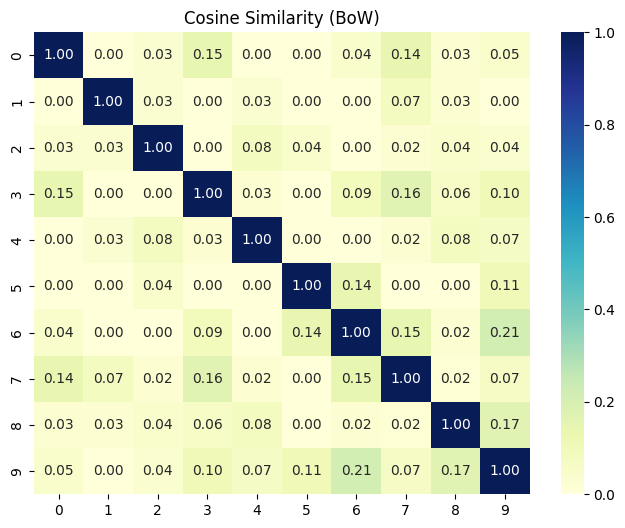

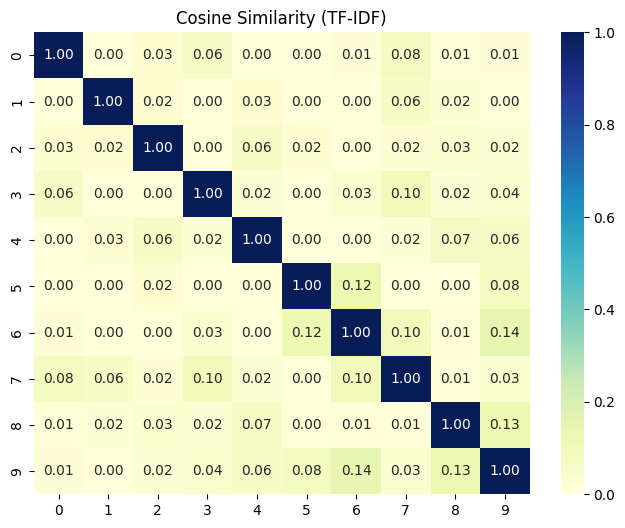

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

texts = [
    "This is that warm, yum gourmand smell I want to smell like but few master. Its that simple combination you want if you want to smell like marshmallow (and vanilla) with just the right amount of depth that it stands on its own. It’s warm sweet and yummy, that ooey gooey marshmallow and warm vanilla (the Tihota type vanilla) and a bit of the Vanille outremer, st barts, vaniglia type vanilla. It is so warm, yum, cozy and delicious.. Worth all of the hype, will be getting a bigger bottle of this.",
    "This cologne is a complete analogue of women's floral EDT, as the term toilet water wasn't adopted in the USSR, as the word toilet was primarily associated with water closet. It's a watercolor-like, seductive floral, combining the sultry warmth of yellow and fiery petals, the light sweetness of pistils and stamens, and at the same time the watery coolness of flowerbeds and garden plots where grandmothers grow phlox, echinacea, asters, gladioli, nasturtiums, golden balls, dahlias, and many others whose names I can't even remember, the names of which I can’t even remember, and together with apples they carry these freshly cut flowers to sell in the flower rows. There's an almost physical sensation of the stems standing in water in tin buckets and the moist, fragrant air wafting over the flower stalls.",
    "While gardenia isn’t listed in the notes, the combination of tuberose and ylang-ylang creates a stunning gardenia effect. There is a beautiful 90s nostalgia to the tuberose here, and the subtle touch of osmanthus rounds it out perfectly. It’s truly lovely, the perfect choice for anyone seeking a classic white floral with an delightful creamy and gummy edge. A simple, well-executed masterpiece.",
    "To me it smells like some green, leafy incense on a hike somewhere in Thailand or something. It's fresh but also like... mechanically fresh. Like some giant hunk-of-metal machine pumped this out to please its enslaved human servants and remind them of a life they will never get to live, outside of the confines of a grey, metallic oasis.",
    "To my nose, it doesn’t resemble Valaya OG or Exclusif; they live in a different lane altogether, much airier and more floaty. This one is built around white florals and a seriously long-lasting, clean soap core. It’s not “wafting in the air” so much as creamy, lathered, and distinctly soapy and yes, white Dove lovers will likely be very happy here.",
    "I absolutely love this! Very musky and dries down powdery. This lasts on my clothes for 8-10 hours minimum. The opening is my favorite part. Great for layering and beautiful on its own. Moderate sillage.",
    "I like it. Very masculine scent. Great for transitional seasons. Daily wear. Opening reminds me the most of Aventus, but dries down to more darker and deeper scent profile. Very mossy and dark scent overall.",
    "This is actually mass-appealing. It has a subtle vegetal nuance that keeps it masculine, which I believe is that seaweed. And no you won't smell like Japanese food or fish (which how I thought about this when I read the reviews and before I actually smelled it) but deep blue fruity freshness with a bit of sea water saltiness. It smells familiar in the best way. The kind of clean, fresh scent you’d expect from a fragrance with an ocean-inspired name.",
    "Amnesia Rose turned out to be a winning rose for me. After growing tired of rose & patchouli pairings and the countless alternatives that circle around a poal-like territory, this one truly stood out. The rose here is noble. Even with saffron, patchouli, and balsamic notes accompanying it, rose remains the dominant force; much like how oceans outweigh continents, it sits above everything else in this composition.",
    "Bought this for my wife. It's a powerful rose and litchi scent with a beautiful drydown. Super close to Delina Exclusif to my nose. It makes me smile like a goofy teenager everytime she wears it. Love it."
]

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    clean_tokens = [
        lemmatizer.lemmatize(w)
        for w in tokens
        if w not in stop_words and w.isalpha()
    ]
    return " ".join(clean_tokens)

processed_texts = [preprocess_text(t) for t in texts]

bow_vectorizer = CountVectorizer()
bow_matrix = bow_vectorizer.fit_transform(processed_texts)

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(processed_texts)

def get_top_n_terms(matrix, vectorizer, n=10):
    feature_names = vectorizer.get_feature_names_out()
    results = []
    for i in range(matrix.shape[0]):
        row = matrix.getrow(i).toarray().flatten()
        top_indices = row.argsort()[-n:][::-1]
        top_terms = [feature_names[idx] for idx in top_indices if row[idx] > 0]
        results.append(top_terms)
    return results

bow_tops = get_top_n_terms(bow_matrix, bow_vectorizer)
tfidf_tops = get_top_n_terms(tfidf_matrix, tfidf_vectorizer)

print("СРАВНЕНИЕ ТОП-10 ТЕРМИНОВ:")
for i in range(10):
    print(f"\nДокумент №{i+1}:")
    print(f"  BoW:    {', '.join(bow_tops[i])}")
    print(f"  TF-IDF: {', '.join(tfidf_tops[i])}")

def plot_sim(matrix, title):
    sim = cosine_similarity(matrix)
    plt.figure(figsize=(8, 6))
    sns.heatmap(sim, annot=True, cmap='YlGnBu', fmt=".2f")
    plt.title(title)
    plt.show()

plot_sim(bow_matrix, "Cosine Similarity (BoW)")
plot_sim(tfidf_matrix, "Cosine Similarity (TF-IDF)")

**Задание 2: Морфологическая разметка текста**

1. Возьмите отрывок текста (минимум 300 слов) на русском и английском языке.
2. Для русского языка используйте PyMorphy2 или PyMorphy3, для английского - NLTK или SpaCy для проведения морфологического анализа.
3. Выполните следующие операции:
* Определите части речи для каждого слова в тексте
* Для существительных определите падеж, род и число
* Для глаголов определите время, лицо и число
* Создайте частотный словарь частей речи в тексте
4. Разработайте функцию, которая будет автоматически изменять текст, заменяя все существительные на их форму множественного числа (где возможно).
5. Результаты морфологического анализа должны быть представлены в виде таблицы.
6. Оцените и прокомментируйте точность определения морфологических характеристик

In [ ]:
import pandas as pd
import pymorphy3
import spacy
import inflect
from collections import Counter

morph = pymorphy3.MorphAnalyzer()
nlp_en = spacy.load("en_core_web_sm")
p_inflect = inflect.engine()

def analyze_russian(text):
    words = text.split()
    data = []
    pos_counts = []

    for word in words:
        clean_word = word.strip(".,!?;:()\"—")
        if not clean_word: continue

        parsed = morph.parse(clean_word)[0]
        pos = parsed.tag.POS
        pos_counts.append(pos)

        features = {}
        if pos == 'NOUN':
            features = {
                'Падеж': parsed.tag.case,
                'Род': parsed.tag.gender,
                'Число': parsed.tag.number
            }
        elif pos in ['VERB', 'INFN']:
            features = {
                'Время': parsed.tag.tense,
                'Лицо': parsed.tag.person,
                'Число': parsed.tag.number
            }

        data.append({
            'Слово': clean_word,
            'Часть речи': pos,
            'Характеристики': str(features) if features else "-"
        })

    return pd.DataFrame(data), Counter(pos_counts)

def analyze_english(text):
    doc = nlp_en(text)
    data = []
    pos_counts = []

    for token in doc:
        if token.is_punct or token.is_space: continue

        pos = token.pos_
        pos_counts.append(pos)
        features = {}

        if pos == 'NOUN':
            features = {'Number': token.morph.get("Number")}

        elif pos == 'VERB':
            features = {
                'Tense': token.morph.get("Tense"),
                'Person': token.morph.get("Person"),
                'Number': token.morph.get("Number")
            }

        data.append({
            'Word': token.text,
            'POS': pos,
            'Features': str(features) if features else "-"
        })

    return pd.DataFrame(data), Counter(pos_counts)

def transform_to_plural(text, lang='rus'):
    if lang == 'rus':
        words = text.split()
        new_words = []
        for word in words:
            clean = word.strip(".,!?;:()\"—")
            p = morph.parse(clean)[0]
            if 'NOUN' in p.tag:
                plural = p.inflect({'plur'})
                new_words.append(plural.word if plural else word)
            else:
                new_words.append(word)
        return " ".join(new_words)

    else:
        doc = nlp_en(text)
        new_text = []
        for token in doc:
            if token.pos_ == "NOUN" and token.morph.get("Number") == ["Sing"]:
                plural = p_inflect.plural(token.text)
                new_text.append(plural + token.whitespace_)
            else:
                new_text.append(token.text_with_ws)
        return "".join(new_text)

eng_text = "Our story today is called The Open Boat. It was written by Stephen Crane and is based on what really happened to him in eighteen ninety-six. Crane was traveling from the United States to Cuba as a newspaper reporter. One night, his ship hit a sandbar. It sank in the Atlantic Ocean, off the coast of Florida. Most of the people on board got into lifeboats. Crane was among the last to leave. There were three others with him: the ship’s captain, the cook, and a sailor. These four men climbed into the only remaining lifeboat. The boat was so small that no one believed it could stay afloat for very long. None of the four men thought he would ever reach the shore. But the men fought the seas bravely, with all their strength. Would they finally reach land? Here is Shep O’Neal with the first part of the story. The small lifeboat bounced from wave to wave in the rough seas of the Atlantic. The four men in the boat could not see the sky. The waves rose too high. The waves with their white tops pushed at the open boat with angry violence. Every man thought each wave would be his last. Surely, the boat would sink and he would drown. The men thought that most adults would need a bathtub larger than the boat they were sailing. The waves were huge, and each created a problem in guiding the direction of the boat. For two days, since the ship sank, the four men had been struggling to reach land. But there was no land to be seen. All the men saw were violent waves which rose and came fiercely down on them. The men sat in the boat, wondering if there was any hope for them. The ship’s cook sat in the bottom of the boat. He kept looking at the fifteen centimeters which separated him from the ocean."
rus_text = "Начальные страницы российской истории связаны с племенами восточных славян, которые заселили Восточно-Европейскую равнину в VI-VII вв. Предки этих племен населяли Центральную и Восточную Европу, античные и византийские источники I-V вв. называли их по-разному: венеды, анты, склавины. Источником пропитания для славянских племен были земледелие, скотоводство, промыслы: охота, рыболовство, собирательство. Племена восточных славян объединялись в союзы племен. Крупнейшими из них были: поляне, древляне, кривичи, вятичи, ильменские славяне. Древнейшая русская летопись, «Повесть временных лет», называет около десяти таких объединений Историки долгое время спорили, с какого момента начинается история России как государства? Первая династия, правившая русским государством с IX по конец XVI в, берет свое начало с 862 года, когда согласно той же «Повести временных лет», ильменские славяне призвали на правление в Новгород варяжского князя Рюрика с дружиной. Государство Русь в IX — начале X века Возникновение нового государства, Киевской Руси, связано с еще одной летописной легендой. К IX веку на землях, заселенных славянскими племенами, сформировалось несколько политических центров со своими князьями во главе. Между ними постоянно происходили столкновения. К тому же, славянские племена подвергались внешнему давлению: были вынуждены платить дань соседнему государству, Хазарскому каганату. Чтобы прекратить внутренние раздоры и избавиться от хазарской угрозы, новгородцы и призвали варягов во главе с Рюриком, что было распространенной практикой в раннее средневековье. Закрепившись в Старой Ладоге и Новгороде, Рюрик отправил в Византию двух своих дружинников, Аскольда и Дира. Последние, достигнув Киева, подчинили себе племена полян и стали княжить. Около 879 года умер князь Рюрик, после него остался малолетний сын Игорь, пока мальчик рос, князем и его опекуном стал Олег. В 882 г. он отправился в поход на Киев, убил Аскольда и Дира и объединил под своей властью два крупнейших городских центра восточных славян. Именно эта дата сегодня считается датой возникновения Древнерусского государства. Киевская Русь во времена правления династии Рюриковичей Преемником Олега стал Игорь, сын Рюрика, который подчинил славянские племена, обитавшие между Днестром и Дунаем, воевал с Константинополем, печенегами. Игорь был убит древлянами в 945 году, когда пытался во второй раз собрать с них дань. "


rus_df, rus_pos = analyze_russian(rus_text)
eng_df, eng_pos = analyze_english(eng_text)

print("Частотный словарь (RU):", dict(rus_pos))
print("\nТаблицы:")
print(rus_df.head(11))
print("\n--------------")
print(eng_df.head(11))

print("\n--- ПРЕОБРАЗОВАНИЕ В МН. ЧИСЛО ---")
print(transform_to_plural(rus_text, lang='rus'))
print(transform_to_plural(eng_text, lang='eng'))

Частотный словарь (RU): {'ADJF': 56, 'NOUN': 132, 'PRTS': 4, 'PREP': 41, 'VERB': 33, None: 13, 'CONJ': 16, 'NPRO': 8, 'ADVB': 6, 'NUMR': 3, 'PRTF': 4, 'PRCL': 3, 'INFN': 5, 'GRND': 2}

Таблицы (первые 10 строк):
         Слово Часть речи                                     Характеристики
0    Начальные       ADJF                                                  -
1     страницы       NOUN  {'Падеж': 'gent', 'Род': 'femn', 'Число': 'sing'}
2   российской       ADJF                                                  -
3      истории       NOUN  {'Падеж': 'gent', 'Род': 'femn', 'Число': 'sing'}
4      связаны       PRTS                                                  -
5            с       PREP                                                  -
6    племенами       NOUN  {'Падеж': 'ablt', 'Род': 'neut', 'Число': 'plur'}
7    восточных       ADJF                                                  -
8       славян       NOUN  {'Падеж': 'gent', 'Род': 'masc', 'Число': 'plur'}
9      которые    

**Задание 3: Синтаксический анализ предложений**

1. Возьмите 2 простых и 3 сложных предложений на русском и английском языке (всего 10 предложений).
2. Используйте SpaCy для построения синтаксических деревьев этих предложений.
3. Для каждого предложения:
* Визуализируйте синтаксическое дерево
* Выделите все подлежащие и сказуемые
* Найдите все пары слов, связанные отношением определения (прилагательное-существительное)
4. Разработайте функцию для извлечения всех объектных и субъектных отношений из предложения в формате (субъект, предикат, объект).
5. Объясните, какие трудности возникают при синтаксическом анализе сложных предложений

In [ ]:
eng_sentences = [
    "The sun shines brightly today.",
    "She loves reading books in the evening.",
    "I wanted to go for a walk, but it started raining heavily.",
    "If you study hard, you will pass the exam with flying colors.",
    "The book that I bought yesterday is very interesting and educational."
]

rus_sentences = [
    "Сегодня на улице очень теплая погода.",
    "Мой кот спит на мягком диване.",
    "Мы решили остаться дома, потому что начался сильный ливень.",
    "Когда наступит весна, птицы начнут петь свои красивые песни.",
    "Я прочитал статью, которую ты мне прислал, и она оказалась полезной."
]

import spacy
from spacy import displacy

nlp_ru = spacy.load("ru_core_news_sm")
nlp_en = spacy.load("en_core_web_sm")

def extract_triplets(doc):
    triplets = []
    for token in doc:
        if token.pos_ == "VERB":
            subj = ""
            obj = ""
            for child in token.children:
                if "subj" in child.dep_:
                    subj = child.text
                if "obj" in child.dep_:
                    obj = child.text
            if subj or obj:
                triplets.append((subj, token.text, obj))
    return triplets

def analyze_syntax_colab(sentences, nlp, lang_name):
    print(f"\n{'='*30}")
    print(f" АНАЛИЗ: {lang_name}")
    print(f"{'='*30}\n")

    for i, sent_text in enumerate(sentences):
        doc = nlp(sent_text)
        print(f"--- Предложение {i+1}: {sent_text}")

        displacy.render(doc, style="dep", jupyter=True, options={'distance': 100})

        subjects = [tok.text for tok in doc if "subj" in tok.dep_]
        predicates = [tok.text for tok in doc if tok.pos_ == "VERB" or tok.dep_ == "ROOT"]

        adj_noun_pairs = [(tok.text, tok.head.text) for tok in doc if tok.dep_ == "amod"]

        triplets = extract_triplets(doc)

        print(f"✅ Подлежащие: {subjects}")
        print(f"✅ Сказуемые: {predicates}")
        print(f"✅ Пары (прил + сущ): {adj_noun_pairs}")
        print(f"✅ Тройки (S, P, O): {triplets}")
        print("-" * 50)

analyze_syntax_colab(rus_sentences, nlp_ru, "Russian")
analyze_syntax_colab(eng_sentences, nlp_en, "English")


 АНАЛИЗ: Russian

--- Предложение 1: Сегодня на улице очень теплая погода.


✅ Подлежащие: ['погода']
✅ Сказуемые: ['улице']
✅ Пары (прил + сущ): [('теплая', 'погода')]
✅ Тройки (S, P, O): []
--------------------------------------------------
--- Предложение 2: Мой кот спит на мягком диване.


✅ Подлежащие: ['кот']
✅ Сказуемые: ['спит']
✅ Пары (прил + сущ): [('мягком', 'диване')]
✅ Тройки (S, P, O): [('кот', 'спит', '')]
--------------------------------------------------
--- Предложение 3: Мы решили остаться дома, потому что начался сильный ливень.


✅ Подлежащие: ['Мы', 'ливень']
✅ Сказуемые: ['решили', 'остаться', 'начался']
✅ Пары (прил + сущ): [('сильный', 'ливень')]
✅ Тройки (S, P, O): [('Мы', 'решили', ''), ('ливень', 'начался', '')]
--------------------------------------------------
--- Предложение 4: Когда наступит весна, птицы начнут петь свои красивые песни.


✅ Подлежащие: ['весна', 'птицы']
✅ Сказуемые: ['наступит', 'начнут', 'петь']
✅ Пары (прил + сущ): [('красивые', 'песни')]
✅ Тройки (S, P, O): [('весна', 'наступит', ''), ('птицы', 'начнут', ''), ('', 'петь', 'песни')]
--------------------------------------------------
--- Предложение 5: Я прочитал статью, которую ты мне прислал, и она оказалась полезной.


✅ Подлежащие: ['Я', 'ты', 'она']
✅ Сказуемые: ['прочитал', 'прислал', 'оказалась']
✅ Пары (прил + сущ): []
✅ Тройки (S, P, O): [('Я', 'прочитал', 'статью'), ('ты', 'прислал', 'мне'), ('она', 'оказалась', '')]
--------------------------------------------------

 АНАЛИЗ: English

--- Предложение 1: The sun shines brightly today.


✅ Подлежащие: ['sun']
✅ Сказуемые: ['shines']
✅ Пары (прил + сущ): []
✅ Тройки (S, P, O): [('sun', 'shines', '')]
--------------------------------------------------
--- Предложение 2: She loves reading books in the evening.


✅ Подлежащие: ['She']
✅ Сказуемые: ['loves', 'reading']
✅ Пары (прил + сущ): []
✅ Тройки (S, P, O): [('She', 'loves', ''), ('', 'reading', 'books')]
--------------------------------------------------
--- Предложение 3: I wanted to go for a walk, but it started raining heavily.


✅ Подлежащие: ['I', 'it']
✅ Сказуемые: ['wanted', 'go', 'started', 'raining']
✅ Пары (прил + сущ): []
✅ Тройки (S, P, O): [('I', 'wanted', ''), ('it', 'started', '')]
--------------------------------------------------
--- Предложение 4: If you study hard, you will pass the exam with flying colors.


✅ Подлежащие: ['you', 'you']
✅ Сказуемые: ['study', 'pass', 'flying']
✅ Пары (прил + сущ): [('flying', 'colors')]
✅ Тройки (S, P, O): [('you', 'study', ''), ('you', 'pass', 'exam')]
--------------------------------------------------
--- Предложение 5: The book that I bought yesterday is very interesting and educational.


✅ Подлежащие: ['book', 'I']
✅ Сказуемые: ['bought', 'is']
✅ Пары (прил + сущ): []
✅ Тройки (S, P, O): [('I', 'bought', 'that')]
--------------------------------------------------


**Задание 4: Распознавание именованных сущностей (Named Entity Recognition)**

1. Подготовьте корпус из 10 новостных текстов, содержащий различные типы именованных сущностей (имена людей, организации, географические названия, даты и т.д.) на английском или русском языке.
2. Используйте SpaCy для автоматического распознавания именованных сущностей.
3. Реализуйте свой простой метод для распознавания имен людей и географических названий с помощью регулярных выражений и словарей.
4. Сравните результаты работы SpaCy и вашего метода:
* Рассчитайте точность (precision), полноту (recall) и F1-меру для вашего метода относительно результатов SpaCy
* Проанализируйте ошибки обоих подходов, какие типы ошибок характерны для каждого подхода
5. Представьте сравнение результатов в виде таблицы

In [5]:
corpora = [" Bohemian Rhapsody won best drama, and its star, Rami Malek, won best actor at the Golden Globes on Sunday night; Green Book took home three awards, including best movie, musical or comedy; and Glenn Close won best actress in a drama, an award many expected to go to Lady Gaga. Here's the complete list of winners.  Not only was Sandra Oh one of the hosts, but she also won her second Golden Globe -- this time for best actress in a television drama as the star of the BBC America series Killing Eve.  The Globes, which often teeter on the edge of tipsy chaos, seemed to be coasting on a mellow, it's-all-good buzz, our TV critic James Poniewozik wrote, adding, It was pleasant enough, though numbing the longer it went on. LOS ANGELES -- In a night of major upsets,  Green Book, a divisive road movie about race relations, emerged as the big winner at the 76th Golden Globe Awards on Sunday, taking"
           'Amazon CEO Jeff Bezos, as a Master of the Universe, is used to being in control of a situation. # But now, after announcing the pending divorce from MacKenzie Bezos, his wife of 25 years, the Amazon founder finds his personal life splattered across the pages of the National Enquirer and, subsequently, the internet and media landscape. # Such a development may be not only personally troublesome and embarrassing but also potentially an issue for Amazon itself. # CEOs and business executives " dont like allowing the world to see what is going on in their personal lives, " said Sheri Warsh, partner at Chicago law firm Levenfeld Pearlstein, who represents high-profile trust and estate litigation clients.  Whether they are CEOs or movie stars or celebrities, we do our best to keep it out of the courts so the world doesnt see what is going on. # However, in Bezos case, its too late. The Enquirer has published a four-month investigation in which it acquired text messages supposedly shared between the Amazon CEO and former Fox L.A. TV anchor Lauren Sanchez, a family acquaintance with whom he reportedly developed a relationship. # One message the Enquirer includes in its report, a snapshot of which is published online and the rest in its current printed issue, has Bezos saying, " I love you, alive girl. I will show you with my body, and my lips and my eyes, very soon. " # Sanchez, 49, is the wife of Hollywood talent agent Patrick Whitesell. She and Whitesell, who owned a home in Seattle and have socialized with'
           'Theodosius Russian Orthodox Cathedral, the same church used in the 1978 film, " The Deer Hunter. " # And like Robert DeNiro, the actor who portrayed an Army Special Forces soldier in the movie, Pristash -- who also served as a Green Beret in Vietnam -- could not bring himself to shoot a deer on a hunting trip after the war. # He still cant. # Scene cut but meets John Wayne # Members of David Pristashs unit pose with actor John Wayne during filming for the 1968 movie " The Green Berets. " Scene cut but meets John Wayne  While Pristash was training in Fort Bragg, North Carolina, his unit helped in production of the 1968 John Wayne movie, " The Green Berets. " # Pristash was part of a night parachute jump that was filmed for the movie but the footage was later cut. # However he did get to meet and share a drink with " the Duke, " and recalled, " He was a big dude. A nice guy. " # Joining the best of the best # David Pristash is all smiles in this photo just before leaving for Vietnam in 1967. (Photo courtesy of David Pristash) # Joining the best of the best # In other respects, Pristashs experiences in the service were nothing like a movie. # After earning a degree in business and finance from Ohio University, Pristash had the option of getting drafted or enlisting with a shot at officers candidate school. # In 1966, hed married Darlene, who would become his wife of 52 years, and told her -- " kind-of tricked her, " he recalled -- that he could probably do something in the Army involving'
           'Scotland’s largest health board has finally admitted that contaminated water at a Glasgow super-hospital caused serious infections in child cancer patients that were linked to four deaths. NHS Greater Glasgow and Clyde (NHSGGC) made the dramatic U-turn in closing submissions to a long-running inquiry that was launched after deaths linked to infections, including that of 10-year-old Milly Main, who died in August 2017 after contracting an infection as she recovered from leukaemia treatment. On Monday morning the Scottish Conservatives demanded an urgent statement from the SNP government’s health secretary, Neil Gray, on the 11th-hour admission to the Scottish hospitals inquiry, which was set up in 2020 to examine the design and construction of the crisis-hit Queen Elizabeth university hospital in Glasgow and the Royal hospital for children, which are on the same campus. Milly was one of two children who died at the Royal hospital for children after being treated on a cancer ward that was later closed because of concerns about water contamination. In closing submissions to the inquiry published before final oral hearings, the health board said it accepted it was “more likely than not” that the children’s infections had “a connection to the state of the hospital water system”. It added: “NHSGGC accepts that, on the balance of probabilities, there is a causal connection between some infections suffered by patients and the hospital environment, in particular the water system.” Milly’s mother, Kimberly Darroch, welcomed the admission but said it should have come much earlier for the families involved. Darroch told BBC Scotland News: “As a mother, I’ve spent six years fighting for answers that should have been given at the very beginning. “It is good news that the health board has admitted that, on the balance of probabilities, there was a causal connection between the environment and Milly’s bloodstream infection. This acknowledgment is a significant milestone for our family, but it also highlights how hard families have had to fight just to have the truth recognised.” The U-turn was hailed as a “turning point” by the Scottish Labour leader, Anas Sarwar, who has pressed the board and the Scottish government for answers for years alongside Darroch. Writing in the Scottish Mail on Sunday, he called for a corporate homicide investigation that is in progress to be expanded to include politicians whom he accused of a “cover-up”. Describing it as “one of the worst failures in modern Scottish public life”, Sarwar wrote: “Since the hospital opened, there has been a litany of serious problems: concerns about water safety, environmental risks, governance failures, and infections that devastated families. “NHS Greater Glasgow and Clyde has been named as a suspect in a corporate homicide investigation relating to the deaths of patients including 10-year-old Milly Main. In my opinion, so should the SNP ministers responsible for the cover-up, because this is a serious criminal matter.” A Scottish government spokesperson said: “We established a statutory public inquiry so that families could get answers to their questions, and so that lessons can be learned for future hospital projects. “As an independent core participant of the inquiry, the Scottish government is committed to assisting the inquiry and therefore it would be inappropriate to comment any further at this time.” A spokesperson for NHSGGC said: “We remain fully committed to supporting the inquiry in its investigations.”'
           'Henry V, in short, is a slippery, ambiguous work that has a chameleon-like quality. Looking back over past productions, I also notice how it subtly changes depending on whether it is played in isolation or presented as part of a sequence. One of the first versions I saw was at Stratford in 1964 when, directed by Peter Hall and John Barton, it was part of an eight-play Shakespeare history cycle: much of the fascination lay in watching Ian Holm’s transition from a coldly calculating Prince Hal to a more sympathetic Henry. Even through the mists of time, I recall how that production struck a balance between rhetoric and reality. Eric Porter’s Chorus was a wholly Elizabethan figure putting a romantic spin on history; Holm’s Henry was a dogged scrapper who after Agincourt joined his rain-drenched troops in pushing a war-wagon offstage while exhaustedly singing a Te Deum.'
           'New York’s Metropolitan Opera has announced a round of layoffs, pay cuts and program reductions as it grapples with financial strain. The organization cited problems left over from the Covid pandemic, which drastically affected performing arts shows across the US and internationally. The cuts include salary reductions of between 4% and 15% for 35 executives earning more than $150,000, including the Met Opera’s general manager Peter Gelb, who earned approximately $1.4m in 2024, the New York Times reported on Tuesday. Other senior figures affected include music director Yannick Nézet-Séguin who earned $2.05m in the most recently disclosed fiscal year.'
           'A hoard of pennies linked to Harold II and most likely buried on the eve of battle in 1066, a rare Roman vehicle fitting, and a group of early medieval objects are among the archaeological finds and treasure discovered in Britain in 2024. It was a record-breaking year for archaeological and treasure finds in Britain, with the highest number recorded in a single year – thanks in large part to metal detectorists. Figures released by the British Museum on Tuesday showed finds reported by the public accounted for 94% of the total, marking a significant increase over the past three years. Metal detecting has surged in popularity, and the museum said the finds demonstrated the contribution made by members of the public to documenting and preserving the nation’s history.'
           'New movies starring Amy Adams, Channing Tatum, Pamela Anderson, Callum Turner and Charli xcx and the directorial debut of British rapper-actor Ashley Walters will headline next month’s Berlin film festival, the first major European cinema showcase of the year. The Berlinale, as the event is known, will spotlight new work on screen from 80 countries in its 76th edition, bringing A-list stars and fresh faces to the German capital during its 12-22 February run. Berlinale director Tricia Tuttle, a US-born former head of the London film festival, unveiled a genre-spanning lineup of 22 pictures vying for the Golden and Silver Bear top prizes, to be awarded by a jury chaired by veteran German film-maker Wim Wenders. Contenders include At the Sea by acclaimed Hungarian director Kornél Mundruczó, featuring six-time Oscar nominee Adams in what Tuttle said was an “absolutely enthralling” performance as a dancer who struggles with sobriety at her family’s home on Cape Cod after a stint in rehab.'
           'For families who are moving around, the consistency of school and the friendships that develop as a result gives much-needed stability. Tamira and Chris Hutchinson left the UK in 2023 to travel the world for a year, looking to expand their horizons. With their three daughters – Olivia (11), Scarlett (nine) and Bella (five) – they explored Malaysia, Thailand, Vietnam, the Philippines, China, Taiwan, South Korea, Japan, Singapore, Indonesia and Qatar. One year quickly turned into two. Tamira initially intended to home school the girls but found as her workload increased that she couldn’t manage full-time home schooling on her own. She found that King’s InterHigh fitted in perfectly with their travelling lifestyle. “At first we were worried that the girls might miss out on something by stepping away from traditional education, but in fact we watched them flourish.'
           'If you work at a desk, aim to break up sitting every 30 to 45 minutes, says Dr Rocco Cavaleri, senior lecturer in physiotherapy at Western Sydney University. Simply standing up for 60 to 90 seconds is enough to reset. “Regular ‘active breaks’ can reduce neck and back discomfort and reduce office stress,” he says. While you are standing, he suggests taking a few deep breaths while rolling your shoulders back. Gently turn your head from side to side. Stretch your chest. Can adult tummy time undo the dreaded ‘tech neck’ that comes from hunching over a screen? Donna Lu Donna Lu Read more Regular posture corrections every half hour can help, says Julia Treleaven, an associate professor at the University of Queensland School of Health and Rehabilitation Sciences. She suggests a 10-second hold to correct your posture every half hour, where you elongate the back of the neck and “set” your shoulder blades apart. Try adding a quick 30-60 second walk during these breaks.'
           ]
import spacy
import re
import pandas as pd
from collections import Counter
nlp = spacy.load("en_core_web_sm")

geo_dict = {"Scotland", "Glasgow", "New York", "London", "Britain", "Berlin", "USA", "Seattle", "Vietnam", "Japan"}
name_pattern = re.compile(r'\b[A-Z][a-z]+(?:\s[A-Z][a-z]+)+\b')

def get_entities(texts):
    spacy_data = []
    custom_data = []

    for i, text in enumerate(texts):
        doc = nlp(text)
        spacy_ents = {(ent.text, ent.label_) for ent in doc.ents if ent.label_ in ['PERSON', 'GPE']}
        spacy_data.append(spacy_ents)

        custom_ents = set()
        for loc in geo_dict:
            if loc in text:
                custom_ents.add((loc, 'GPE'))
        for match in name_pattern.finditer(text):
            if match.group() not in geo_dict:
                custom_ents.add((match.group(), 'PERSON'))
        custom_data.append(custom_ents)

    return spacy_data, custom_data

def calculate_metrics(gold_data, pred_data):
    tp, fp, fn = 0, 0, 0
    for gold, pred in zip(gold_data, pred_data):
        tp += len(gold.intersection(pred))
        fp += len(pred - gold)
        fn += len(gold - pred)

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return precision, recall, f1

spacy_ents, custom_ents = get_entities(corpora)

if len(spacy_ents) > 0:
    p, r, f1 = calculate_metrics(spacy_ents, custom_ents)

    print("\n" + "="*50)
    print("СРАВНЕНИЕ РЕЗУЛЬТАТОВ NER (Custom vs SpaCy)")
    print("="*50)

    metrics_data = {
        "Metric": ["Precision", "Recall", "F1-Score"],
        "Value": [f"{p:.2f}", f"{r:.2f}", f"{f1:.2f}"]
    }
    df = pd.DataFrame(metrics_data)
    print(df.to_string(index=False))

    print("\n" + "="*50)

    sample_idx = 1 if len(spacy_ents) > 1 else 0
    print(f"ПРИМЕРЫ РАСПОЗНАВАНИЯ (Текст №{sample_idx + 1}):")
    print("-" * 50)

    s_sample = list(spacy_ents[sample_idx])[:3]
    c_sample = list(custom_ents[sample_idx])[:3]

    print(f"SpaCy  : {s_sample}")
    print(f"Custom : {c_sample}")
    print("="*50)


СРАВНЕНИЕ РЕЗУЛЬТАТОВ NER (Custom vs SpaCy)
   Metric Value
Precision  0.51
   Recall  0.41
 F1-Score  0.46

ПРИМЕРЫ РАСПОЗНАВАНИЯ (Текст №1):
--------------------------------------------------
SpaCy  : [('Callum Turner', 'PERSON'), ('Elizabethan', 'PERSON'), ('Holm’s Henry', 'PERSON')]
Custom : [('Greater Glasgow', 'PERSON'), ('Callum Turner', 'PERSON'), ('Seattle', 'GPE')]
